<a href="https://colab.research.google.com/github/gabrielmedeirosduarte/gabrielmedeirosduarte/blob/main/Dinamica_Veicular.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import math

In [ ]:
# Parâmetros Gerais
h = 500                         # Altura do CG
d = 2600                        # Comprimento do veículo
W_person = 80                   # Massa do condutor
g = 9.807                       # Aceleração da Gravidade
l = 1540                        # Largura do Veículo
m = 1080

# Parâmetros considerando Reboque
R_hz = 0
R_hx = 0
D_A = 0
h_h = 0
h_a = 0
d_h = 0
R = 431 #raio da roda
atrito = 0.6

In [ ]:
# Veículo parado em pista plana sem inclinação

a = 0                             # Aceleração
theta = 0                          

W_f = 680 + W_person*0.45         # Massa no Eixo Frontal
W_r = 400 + W_person*0.55         # Massa no Eixo Traseiro
W = W_f + W_r                     # Massa Total

b = (d*W_r)/(W*1000)              # Distancia da roda dianteira ao CG 
c = (d*W_f)/(W*1000)              # Distancia da roda traseira ao CG

F_r = W*g*c/d                     # Carga no eixo traseiro
F_f = W*g*b/d                     # Carga no eixo dianteiro

# Distribuição de peso lateral 48/52

l_1 = 0.48*l                      # Distância do CG às rodas direitas
l_2 = 0.52*l                      # Distância do CG às rodas esquerdas


# Distância Lateral
b1 = l_1 * W_f
b2 = l_2 * W_r

# Altura do CG

h = R + (b - 2*W_f * l /(m * g)) * math.degrees(math.atanh(theta))



print("Distância da roda dianteira até o CG: ", round(b,3), " m")
print("Distância da roda traseira até o CG: ", round(c,3), " m")
print("Altura do CG: ", round(h/1000,3), " m")
print("Carga no eixo traseiro: ", round(F_r,3), " N")
print("Carga no eixo dianteiro: ", round(F_f,3), " N")
print("Distância do CG às rodas direitas: ", round(l_1,3), " mm")
print("Distância do CG às rodas esquerdas: ", round(l_2,3), " mm")
print("Distância Lateral do CG: ", round(b1,3), " mm")
print("Distância Lateral do CG: ", round(b2,3), " mm")
print("Altura do CG: ",round(h,3), " mm")

Distância da roda dianteira até o CG:  0.995  m
Distância da roda traseira até o CG:  1.605  m
Altura do CG:  0.431  m
Carga no eixo traseiro:  7.022  N
Carga no eixo dianteiro:  4.354  N
Distância do CG às rodas direitas:  739.2  mm
Distância do CG às rodas esquerdas:  800.8  mm
Distância Lateral do CG:  529267.2  mm
Distância Lateral do CG:  355555.2  mm
Altura do CG:  431.0  mm


In [ ]:

# Veículo parado em pista plana inclinada

a = 0
thetas = np.linspace(np.degrees(-np.pi/6), np.degrees(np.pi/6), 100)

# Força nos eixos
Fx1 = atrito * W_f
Fx2 = atrito * W_r

# Força de Frenagem
FT = Fx1 + Fx2

# Tilting Angle
tilting_angle =math.degrees(math.atan(h/b))

# Ângulo limite
angulo_limite = math.degrees(math.atan(c*atrito/((d/1000) - atrito * h)))


print("O Tilting Angle será de: ",round(tilting_angle,3) , "°")
print("O ângulo limite será de: ",round(angulo_limite,3) , "°")
print("Força no Eixo Frontal: ",round(Fx1,3) , "N")
print("Força no Eixo Traseiro: ",round(Fx2,3) , "N")
print("Força Four-Wheel Braking: ",round(FT,3) , "N")

O Tilting Angle será de:  89.868 °
O ângulo limite será de:  -0.216 °
Força no Eixo Frontal:  429.6 N
Força no Eixo Traseiro:  266.4 N
Força Four-Wheel Braking:  696.0 N


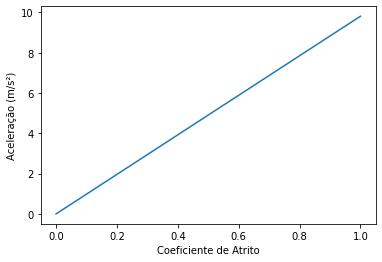

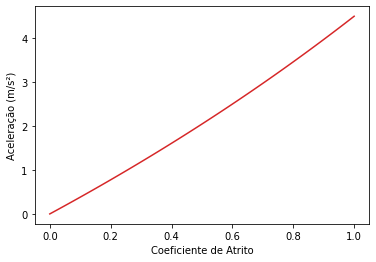

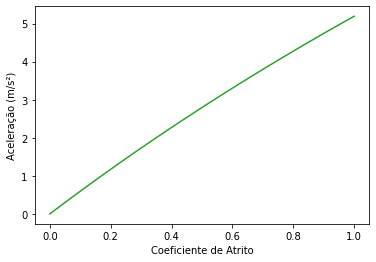

Carga no eixo dianteiro: 6060.35 N
Carga no eixo traseiro: 5315.77 N
Força Trativa em cada roda:
Tração dianteira: 2900.0 N
Tração traseira: 2900.0 N
Tração integral: 1450.0 N
Acelerações Máximas:
Tração integral: 9.807 m/s²
Tração traseira: 4.5 m/s²
Tração dianteira: 5.193 m/s²


In [ ]:
# Veículo acelerado em pista plana sem inclinação

a = 5
theta = 0

# Cargas nos eixos

F_z1 = ((W*g*c*1000)/(2*d)) - ((W*a*h)/(2*d))     # Carga no Eixo Dianteiro
F_z2 = ((W*g*b*1000)/(2*d)) + ((W*a*h)/(2*d))     # Carga no Eixo Traseiro

# Forças trativas

F_xawd = W*a/4                  # Força trativa em tração integral
F_xrwd = W*a/2                  # Força trativa em tração traseira
F_xfwd = W*a/2                  # Força trativa em tração dianteira

# Aceleração máxima em linha reta

mis = np.linspace(0, 1, 100)                      # Variação do Coeficiente de Atrito

a_awd = mis*g                                     # Aceleração Máxima Tração Integral

a_rwd = ((b*mis*g)/((d/1000)-(h*mis/1000)))       # Aceleração Máxima Tração Traseira

a_fwd = ((c*mis*g)/((d/1000)+(h*mis/1000)))       # Aceleração Máxima Tração Dianteira

# Gráficos

plt.plot(mis, a_awd, 'tab:blue')
plt.xlabel('Coeficiente de Atrito')
plt.ylabel('Aceleração (m/s²)')
plt.show()

plt.plot(mis, a_rwd, 'tab:red')
plt.xlabel('Coeficiente de Atrito')
plt.ylabel('Aceleração (m/s²)')
plt.show()

plt.plot(mis, a_fwd, 'tab:green')
plt.xlabel('Coeficiente de Atrito')
plt.ylabel('Aceleração (m/s²)')
plt.show()

print("Carga no eixo dianteiro:", round (2*F_z1,3), "N")
print("Carga no eixo traseiro:", round (2*F_z2,3), "N")

print("Força Trativa em cada roda:")
print("Tração dianteira:", round (F_xfwd,3), "N")
print("Tração traseira:", round (F_xrwd,3), "N")
print("Tração integral:", round (F_xawd,3), "N")

print("Acelerações Máximas:")
print("Tração integral:", g, "m/s²")
print("Tração traseira:", round (np.amax(a_rwd),3), "m/s²")
print("Tração dianteira:", round (np.amax(a_fwd),3), "m/s²")

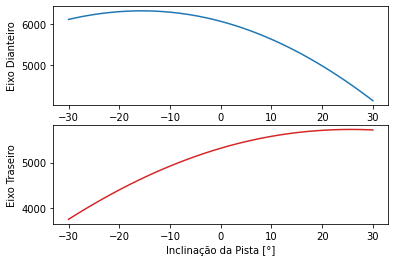

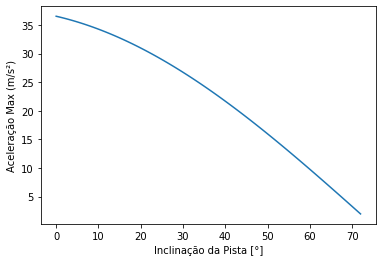

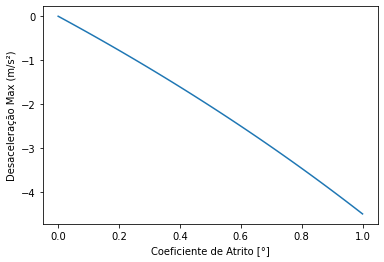

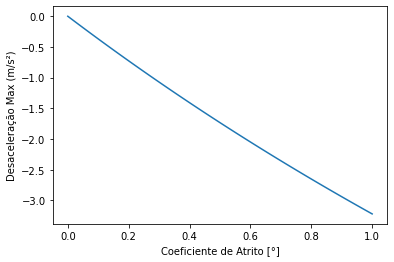

In [ ]:
# Veículo acelerado em pista plana inclinada (sem trailer)

a = 5
phis = np.linspace(np.degrees(-np.pi/6), np.degrees(np.pi/6), 100)          # Inclinação da pista (-30, 30)

# Cargas nos eixos

Fi_z1 = W*g*((c*1000*np.cos(np.radians(phis))/d)-(h*np.sin(np.radians(phis)/d))) - W*(a*h/d)    # Carga nos eixos dianteiros
Fi_z2 = W*g*((b*1000*np.cos(np.radians(phis))/d)+(h*np.sin(np.radians(phis)/d))) + W*(a*h/d)    # Carga nos eixos traseiros

# Limites de Aceleração

phis_1 = np.linspace(np.degrees(0), np.degrees(np.pi/2.5), 100)                 # Inclinação da pista (0, 72)

a_max = g*(1000*c*np.cos(np.radians(phis_1))/h - np.sin(np.radians(phis_1)))    # Aceleração Máxima em Função do Ângulo

# Desaceleração máxima

a_fwb = g*(-(mis/(1-(mis*h/d)))*(1-(c*1000/d)))                 # Desaceleração Máxima Freio Dianteiro

a_rwb = g*(-(mis/(1+(mis*h/d)))*(b*1000/d))                     # Desaceleração Máxima Freio Traseiro

# Gráficos

fig, axs = plt.subplots(2)
axs[0].plot(phis, Fi_z1, 'tab:blue')
axs[0].set_xlabel('Inclinação da Pista [°]')
axs[0].set_ylabel('Eixo Dianteiro')
axs[1].plot(phis, Fi_z2, 'tab:red')
axs[1].set_xlabel('Inclinação da Pista [°]')
axs[1].set_ylabel('Eixo Traseiro')
plt.show()

plt.plot(phis_1, a_max, 'tab:blue')
plt.xlabel('Inclinação da Pista [°]')
plt.ylabel('Aceleração Max (m/s²)')
plt.show()

plt.plot(mis, a_fwb, 'tab:blue')
plt.xlabel('Coeficiente de Atrito [°]')
plt.ylabel('Desaceleração Max (m/s²)')
plt.show()

plt.plot(mis, a_rwb, 'tab:blue')
plt.xlabel('Coeficiente de Atrito [°]')
plt.ylabel('Desaceleração Max (m/s²)')
plt.show()

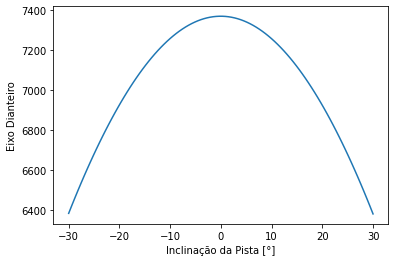

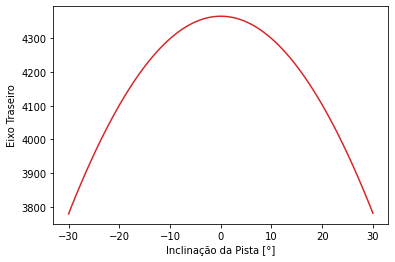

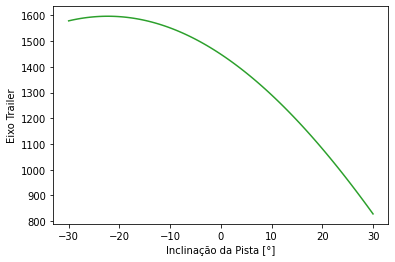

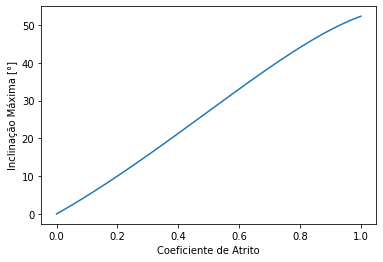

In [ ]:
# Veículo acelerado em pista plana inclinada (com trailer)

a = 5
phis = np.linspace(np.degrees(-np.pi/6), np.degrees(np.pi/6), 100)          # Inclinação da pista (-30, 30)

# Dados do trailer

W_t = 150                   # Peso do Trailer
b_1 = (680)/1000            # Distancia entre roda traseira e engate
b_2 = (610)/1000            # Distancia entre engate e CG do trailer
b_3 = (120)/1000            # Distancia entre CG do trailer e roda do trailer
h_1 = (310)/1000            # Altura do engate
h_2 = (560)/1000            # Altura do CG do trailer

# Carga no Eixo Dianteiro

F_zt1 = (1000*b_3*g*np.cos(np.radians(phis))/(2*d))*(((2*c-b_1)*W_t)/(b_2-b_3)+(c*W/b_3)) + ((a+g*np.sin(np.radians(phis)))/(2*d))*((((2*c-b_1)*(h_1-h_2)*W_t)/(b_2-b_3))-(h_1*W_t)-(h*W/1000))

# Carga no Eixo Traseiro

F_zt2 = (1000*b_3*g*np.cos(np.radians(phis))/(2*d))*(((b-c+b_1)*W_t)/(b_2-b_3)+(b*W/b_3)) + ((a+g*np.sin(np.radians(phis)))/(2*d))*((((b-c+b_1)*(h_1-h_2)*W_t)/(b_2-b_3))+(h_1*W_t)+(h*W/1000))

# Ângulo Máximo de Inclinação

phi_max = np.rad2deg(np.arcsin((2*mis*(F_zt1+F_zt2))/((W+W_t)*g)))

# Carga no Eixo do Trailer

F_zt3 = ((W_t*(b_2*g*np.cos(np.radians(phis))+((h_1-h_2)*(a+g*np.sin(np.radians(phis))))))/(2*(b_2-b_3)))

# Gráficos

plt.plot(phis, 2*F_zt1, 'tab:blue')
plt.xlabel('Inclinação da Pista [°]')
plt.ylabel('Eixo Dianteiro')
plt.show()

plt.plot(phis, 2*F_zt2, 'tab:red')
plt.xlabel('Inclinação da Pista [°]')
plt.ylabel('Eixo Traseiro')
plt.show()

plt.plot(phis, 2*F_zt3, 'tab:green')
plt.xlabel('Inclinação da Pista [°]')
plt.ylabel('Eixo Trailer')
plt.show()

plt.plot(mis, phi_max, 'tab:blue')
plt.xlabel('Coeficiente de Atrito')
plt.ylabel('Inclinação Máxima [°]')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in arctanh


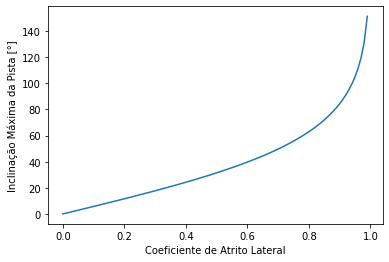

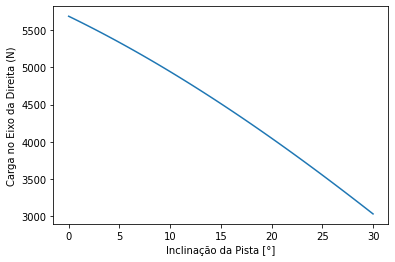

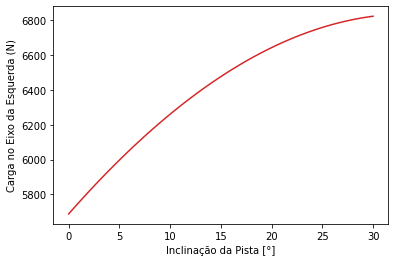

In [ ]:
# Veículo parado em pista lateralmente inclinada

a = 0

mis = np.linspace(0, 1, 100)       # Variação do Coeficiente de Atrito Lateral

#Ângulo de Inclinação da Pista (em graus)
Fis = np.linspace(np.degrees(0), np.degrees(np.pi/6), 100)          # Inclinação da pista (-30, 30)

#Parâmetros do Veículo 
b1 = 750          #Rodas da Esquerda até o CG (em mm)
b2 = b1
w = 1500          #Largura/Width do veículo (em mm)
l = 2300          #Comprimento/Lengh do veículo (em mm)
h = 500           #Altura/Heigh do veículo (em mm)
M = W             # Massa do Veículo

ang_max = np.rad2deg(np.arctanh(mis))   # Angulo máximo de inclinação da pista

# Carga nas rodas da direita
Fz1 = (0.5*W*g*(b1/w)*np.cos(np.radians(Fis))) - (0.5*W*g*(h/w)*np.sin(np.radians(Fis)))

#Carga nas rodas da esquerda
Fz2 = (0.5*W*g*(b2/w)*np.cos(np.radians(Fis))) + (0.5*W*g*(h/w)*np.sin(np.radians(Fis)))

#Gráficos

plt.plot(mis, ang_max, 'tab:blue')
plt.xlabel('Coeficiente de Atrito Lateral')
plt.ylabel('Inclinação Máxima da Pista [°]')
plt.show()

plt.plot(Fis, 2*Fz1, 'tab:blue')
plt.xlabel('Inclinação da Pista [°]')
plt.ylabel('Carga no Eixo da Direita (N)') #Direita, observando de frente para o veículo
plt.show()

plt.plot(Fis, 2*Fz2, 'tab:red')
plt.xlabel('Inclinação da Pista [°]')
plt.ylabel('Carga no Eixo da Esquerda (N)')
plt.show()